In [114]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import re
%matplotlib inline

In [115]:
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
          'Delaware', 'Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Iowa','Illinois', 
          'Indiana','Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
          'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
          'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
          'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
          'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


In [116]:
earlier_data = pd.read_json("bp_accounts/2012_14.json")
later_data = pd.read_json("bp_accounts/2016_18.json")
tweet_df = pd.concat([earlier_data,later_data])
tweet_df

,State,Body,Party,Year,Name,Official Twitter,Campaign Twitter,"<img alt=""Twitter"" height=""86"" src=""https://cdn.ballotpedia.org/images/8/88/Candidate_Connection_Twitter.png"" width=""82""/>",Personal Twitter,"<em xmlns=""http://www.w3.org/1999/xhtml"">Twitter</em>"
0,Alabama,U.S. House,Republican,2012,Robert Aderholt,https://www.twitter.com/Robert_Aderholt,NaN,NaN,NaN,NaN
1,Alabama,U.S. House,Republican,2012,Peter Gounares,NaN,NaN,NaN,NaN,NaN
2,Alabama,U.S. House,Democratic,2012,Charlie L. Holley,NaN,NaN,NaN,NaN,NaN
3,Alabama,U.S. House,Republican,2012,Pete Riehm,NaN,NaN,NaN,NaN,NaN
4,Alabama,U.S. House,Republican,2012,Phil Norris (Alabama),NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4151,Alabama,U.S. House,Republican,2016,Robert Rogers,NaN,https://www.twitter.com/BoRo71684016,NaN,NaN,NaN
4152,Alabama,U.S. Senate,Republican,2016,John Martin (Alabama),NaN,NaN,NaN,NaN,NaN
4153,Alaska,U.S. House,Republican,2016,Don Young (Alaska),https://www.twitter.com/RepDonYoung,https://www.twitter.com/DonYoungAK,https://twitter.com/home?status=.%40DonYoungAK...,NaN,NaN
4154,Alabama,U.S. House,Republican,2016,Robert Aderholt,https://www.twitter.com/Robert_Aderholt,NaN,NaN,NaN,NaN


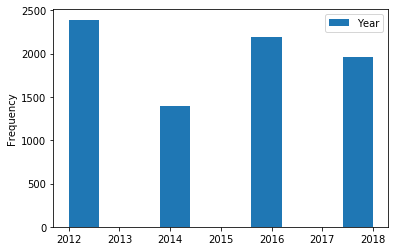

In [117]:
tweet_df = tweet_df[['State', 'Body', 'Party', 'Year', 'Name', 'Campaign Twitter',
                   'Personal Twitter', 'Official Twitter']]
tweet_df.plot.hist('Year')

In [118]:
def party_diff(election_df:pd.DataFrame)->float:
    """[summary]

    Arguments:
        election_df {pd.DataFrame} -- DF with just a single election
        
    Returns:
        float -- p-value for difference between those who ran and those with twitter accounts
    """ 
    party_counts = pd.value_counts(election_df['Party'])
    election_df.dropna(how='all', inplace=True, subset=['Campaign Twitter',
                                                    'Personal Twitter', 'Official Twitter'])
    account_count = pd.value_counts(election_df.Party)
    ax = party_counts.plot.bar(title='Candidate Distribution')
    account_count.plot.bar(title='Account Distribution', ax=ax)
    plt.show()
    return stats.chisquare(account_count, party_counts)

tweet_df.groupby('Year').describe()

State                          Body                          Party  \
     count unique         top freq count unique         top  freq count   
Year                                                                      
2012  2392     50  California  259  2392      2  U.S. House  2086  2392   
2014  1390     50  California  129  1390      2  U.S. House  1151  1390   
2016  2191     50  California  203  2191      2  U.S. House  2040  2191   
2018  1965     50       Texas  196  1965      2  U.S. House  1609  1965   

             ...                       Campaign Twitter      Personal Twitter  \
     unique  ...                                    top freq            count   
Year         ...                                                                
2012      2  ...   https://www.twitter.com/WalshFreedom    1               82   
2014      2  ...      https://www.twitter.com/AlanMCohn    1               66   
2016      2  ...  https://www.twitter.com/McKinleyforWV    1              177   
2018      3  ...  https://www.twitter.com/elvisdpresley    1              542   

                                                         Official Twitter  \
     unique                                     top freq            count   
Year                                                                        
2012     82   https://www.twitter.com/Best4Governor    1              235   
2014     66  https://www.twitter.com/matthewfecteau    1               58   
2016    177     https://www.twitter.com/mattheinzmd    1              305   
2018    542   https://www.twitter.com/eldercongress    1              109   

                                                        
     unique                                   top freq  
Year                                                    
2012    235    https://www.twitter.com/RepLaMalfa    1  
2014     58  https://www.twitter.com/senatemajldr    1  
2016    305    https://www.twitter.com/RepLaMalfa    1  
2018    109  https://www.twitter.com/RepConorLamb    1  

[4 rows x 28 columns]

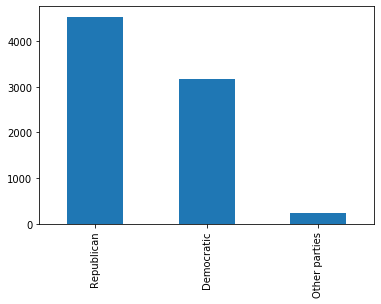

In [119]:
party_counts = pd.value_counts(tweet_df['Party'])
pd.value_counts(tweet_df['Party']).plot.bar()

tweet_df.dropna(how='all', inplace=True, subset=['Campaign Twitter',
                                                'Personal Twitter', 'Official Twitter'])
# pd.value_counts(df['Year']).plot.bar()

Power_divergenceResult(statistic=4449.82693753118, pvalue=0.0)

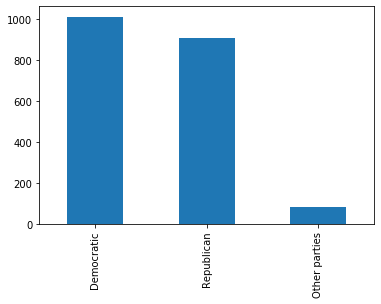

In [120]:
pd.value_counts(tweet_df['Party']).plot.bar()
stats.chisquare(pd.value_counts(tweet_df.Party), party_counts)

In [72]:
#2012 
def get_district_2012(race_row):
    region_info = race_row['State'].split(",")
    state, district = region_info[0].split(',')[0], "".join(region_info[1:]).strip()
    return state.strip(), district.strip()
house12, senate12 = pd.read_csv('elections/2012/2012_house.csv'), pd.read_csv('elections/2012/2012_senate.csv')
house12['State'], house12['District'] = zip(*house12.apply(get_district_2012, axis=1))
senate12['District'] = 'Senate'
elections12 = pd.concat([house12,senate12])
assert all(elections12.State.apply(lambda state: state in states))
elections12['Year'] = 2012

elections12.District.unique()

array(['District 7', 'District 13', 'District 4', 'District 1',
       'District 18', 'District 2', 'District 6', 'District 10',
       'District 27', 'District 21', 'District 52', 'District 5',
       'District 12', 'District 23', 'District 9', 'District 16',
       'District 15', 'District 11', 'District 19', 'District 24',
       'District 26', 'District 36', 'District 17', 'District 3',
       'District 8', 'District 33', 'District 14', 'District 22',
       'District 25', 'District 31', 'At-Large District', 'District 35',
       'District 47', 'District 39', 'District 49', 'District 45',
       'District 40', 'District 41', 'District 32', 'District 44',
       'District 30', 'District 42', 'District 48', 'District 53',
       'District 34', 'District 46', 'District 20', 'District 38',
       'District 50', 'District 28', 'District 43', 'District 51',
       'District 29', 'District 37', 'Senate'], dtype=object)

In [75]:
#2014
def get_district_2014(race_row):
    # print(race_row)
    if 'at-large' in race_row['District'].lower():
        state_district = race_row.District.lower().partition('at-large')
        return state_district[0].split('\'')[0].strip().title(), "".join(state_district[1:]).strip().title()
    else:
        state_district = race_row.District.partition('District')
        return  state_district[0].strip(), "".join(state_district[1:]).strip()
house14, senate14 = pd.read_csv('elections/2014/2014_house.csv'), pd.read_csv('elections/2014/2014_senate.csv')
house14['State'], house14['District'] = zip(*house14.apply(get_district_2014, axis=1))
senate14['District'] = 'Senate'
elections14 = pd.concat([house14,senate14])
elections14.rename(columns={'Total Vote':'Total Votes'}, inplace=True)
elections14.replace({"West Virginia,":'West Virginia','Louisiana Runoff Election':'Louisiana', 'Oklahoma Special Election': 'Oklahoma', 'South Carolina Special Election':'South Carolina'}, inplace=True)
assert all(elections14.State.apply(lambda state: state in states))
elections14['Year'] = 2014
def remove_special(dist_str):
    if dist_str not in ['Senate', 'At-Large District'] and not re.match('^\w{8} \d{1,2}$',dist_str):
        return re.search('^\w{8} \d{1,2}',dist_str).group()
    return dist_str
elections14.District = elections14.District.apply(remove_special)
elections14

,District,Winner,Margin of Victory,Total Votes,Top Opponent,State,Year
0,District 1,Bradley Byrne,36.4%,152234,Burton LeFlore,Alabama,2014
1,District 2,Martha Roby,34.8%,167952,Erick Wright,Alabama,2014
2,District 3,Mike Rogers,32.4%,"156,620",Jesse Smith,Alabama,2014
3,District 4,Robert Aderholt,97.1%,134752,Write-in,Alabama,2014
4,District 5,Mo Brooks,49.3%,"154,974",Jerry Hill,Alabama,2014
...,...,...,...,...,...,...,...
31,Senate,Lamar Alexander,31.7%,"1,301,733",Gordon Ball,Tennessee,2014
32,Senate,John Cornyn,27.2%,"4,647,371",David Alameel,Texas,2014
33,Senate,Mark Warner,0.8%,"2,184,473",Ed Gillespie,Virginia,2014
34,Senate,Shelley Moore Capito,27.6%,"451,498",Natalie Tennant,West Virginia,2014


In [80]:
#2016
house16, senate16 = pd.read_csv('elections/2016/2016_house.csv'), pd.read_csv('elections/2016/2016_senate.csv')
house16['State'], house16['District'] = zip(*house16.apply(get_district_2014, axis=1))
senate16.reset_index(inplace=True)
new_header = senate16.iloc[0] #grab the first row for the header
senate16 = senate16[1:] #take the data less the header row
senate16.columns = new_header #set the header row as the df header
senate16['District'] = 'Senate'
elections16 = pd.concat([house16,senate16])
elections16.rename(columns={'Total Vote':'Total Votes'}, inplace=True)
assert all(elections16.State.apply(lambda state: state in states))
elections16['Year'] = 2016

elections16.District.unique()

array(['District 1', 'District 2', 'District 3', 'District 4',
       'District 5', 'District 6', 'District 7', 'At-Large District',
       'District 8', 'District 9', 'District 10', 'District 11',
       'District 12', 'District 13', 'District 14', 'District 15',
       'District 16', 'District 17', 'District 18', 'District 19',
       'District 20', 'District 21', 'District 22', 'District 23',
       'District 24', 'District 25', 'District 26', 'District 27',
       'District 28', 'District 29', 'District 30', 'District 31',
       'District 32', 'District 33', 'District 34', 'District 35',
       'District 36', 'District 37', 'District 38', 'District 39',
       'District 40', 'District 41', 'District 42', 'District 43',
       'District 44', 'District 45', 'District 46', 'District 47',
       'District 48', 'District 49', 'District 50', 'District 51',
       'District 52', 'District 53', 'Senate'], dtype=object)

In [109]:
#2018
def get_district_2018(dist_data):
    if 'at-large' in dist_data:
        state_district = dist_data.lower().partition('at-large')
        return state_district[0].split('\'')[0].strip().title(), 'At-Large District'
    else:
        dist_num = re.search('\d+', dist_data).group()
        return re.split('\d+', dist_data)[0].split('\'')[0], 'District '+dist_num
house18, senate18 = pd.read_csv('elections/2018/2018_house.csv'), pd.read_csv('elections/2018/2018_senate.csv')
house18['State'], house18['District'] = zip(*house18.District.apply(get_district_2018))
senate18['State'] = senate18['District'].apply(lambda x: x.split(',')[1])
senate18['District'] = 'Senate'
elections18 = pd.concat([house18,senate18])
elections18.State = elections18.State.str.strip()
assert all(elections18.State.apply(lambda state: state in states))
elections18.rename(columns={'Runner-up':'Top Opponent', 'Margin of victory':'Margin of Victory', 'Total votes':'Total Votes'}, inplace=True)
elections18 = elections18[['District', 'Winner',	'Margin of Victory',	'Total Votes',	'Top Opponent',	'State']]
elections18['Year'] = 2018
elections18

,District,Winner,Margin of Victory,Total Votes,Top Opponent,State,Year
0,At-Large District,Liz Cheney,33.82%,"201,245",Greg Hunter,Wyoming,2018
1,District 8,Michael Gallagher,27.43%,"328,675",Beau Liegeois,Wisconsin,2018
2,District 7,Sean Duffy,21.61%,"322,787",Margaret Engebretson,Wisconsin,2018
3,District 6,Glenn Grothman,11.01%,"324,847",Dan Kohl,Wisconsin,2018
4,District 5,Jim Sensenbrenner,23.97%,"364,005",Tom Palzewicz,Wisconsin,2018
...,...,...,...,...,...,...,...
28,Senate,Kirsten Gillibrand,34.00%,"6,055,151",Chele Farley,New York,2018
29,Senate,Ben Cardin,34.55%,"2,299,889",Tony Campbell,Maryland,2018
30,Senate,John Barrasso,36.86%,"203,420",Gary Trauner,Wyoming,2018
31,Senate,Bernie Sanders,39.93%,"272,624",Lawrence Zupan,Vermont,2018


In [113]:
elections = pd.concat([eval(f'elections{year}')for year in range(12, 20, 2)])
elections['Margin of Victory'] = elections['Margin of Victory'].str.strip('%').astype(float)
assert all(elections.State.apply(lambda state: state in states))

In [121]:
def candidate_gen(dist_row):
    region_dict = dist_row[['State', 'District', 'Year']]
    winner_dict, loser_dict = region_dict.copy(), region_dict.copy()
    winner_dict['Candidate'], loser_dict['Candidate'] = dist_row['Winner'], dist_row['Top Opponent']
    margin = dist_row['Margin of Victory']
    winner_dict['Vote Share'], loser_dict['Vote Share'] = round((margin+100)/2), round(100-(margin+100)/2)
    winner, loser = pd.DataFrame(winner_dict), pd.DataFrame(loser_dict)
    
    return winner, loser
    # winner = pd.DataFrame({State, District,Year})
district_candidates = elections.apply(candidate_gen, axis=1).tolist()

In [122]:
candidates = []
for district in range(len(district_candidates)):
    for i in range(2):
        candidates.append(district_candidates[district][i].transpose())

In [124]:
candidate_df = pd.concat(candidates).reset_index(drop=True).dropna()
candidate_df = candidate_df[~candidate_df.Candidate.str.contains("Write|nopposed")]
candidate_df.sort_values(by=['Year', 'State', 'Candidate'], inplace=True)
candidate_df

,State,District,Year,Candidate,Vote Share
477,Alabama,District 5,2012,Charlie L. Holley,35
689,Alabama,District 4,2012,Daniel H. Boman,26
719,Alabama,District 7,2012,Don Chamberlain,24
850,Alabama,District 1,2012,Jo Bonner,98
457,Alabama,District 3,2012,John Andrew Harris,36
...,...,...,...,...,...
2831,Wisconsin,District 5,2018,Tom Palzewicz,38
3751,Wyoming,Senate,2018,Gary Trauner,32
2823,Wyoming,At-Large District,2018,Greg Hunter,33
3750,Wyoming,Senate,2018,John Barrasso,68


In [128]:
tweet_df.Name = tweet_df.Name.apply(lambda name: re.sub("\(.*\)", "", name).strip())
candidate_df.Candidate.str.split()

477      [Charlie, L., Holley]
689        [Daniel, H., Boman]
719         [Don, Chamberlain]
850               [Jo, Bonner]
457     [John, Andrew, Harris]
                 ...          
2831          [Tom, Palzewicz]
3751           [Gary, Trauner]
2823            [Greg, Hunter]
3750          [John, Barrasso]
2822             [Liz, Cheney]
Name: Candidate, Length: 3677, dtype: object